<h1>분류 학습</h1> <br/>
&nbsp;<h2>2.1 분류와 회귀</h2> <br/>
&nbsp;&nbsp;분류 : 여러 레이블 중 하나를 예측하는 것(이진 분류, 다중 분류) <br/>
&nbsp;&nbsp;회귀 : 연속적인 숫자, 부동소수점수를 예측하는 것<br/>
&nbsp;&nbsp;구분방법 : 출력 값에 연속성이 있는지?

&nbsp;<h2>2.2 일반화, 과대적합, 과소적합</h2><br/>
&nbsp;&nbsp;일반화 : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면, training set에서 test set로 generalization 되었다고 함<br/>
&nbsp;&nbsp;과대적합 : 모델이 training set의 각 샘플에 가깝게 맞춰져 새로운 데이터에 일반화되기 어려움<br/>
&nbsp;&nbsp;과소적합 : 너무 간단한 모델이 선택됨

&nbsp;<h2>2.3 지도 학습 알고리즘</h2><br/>

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

X.shape: (26, 2)


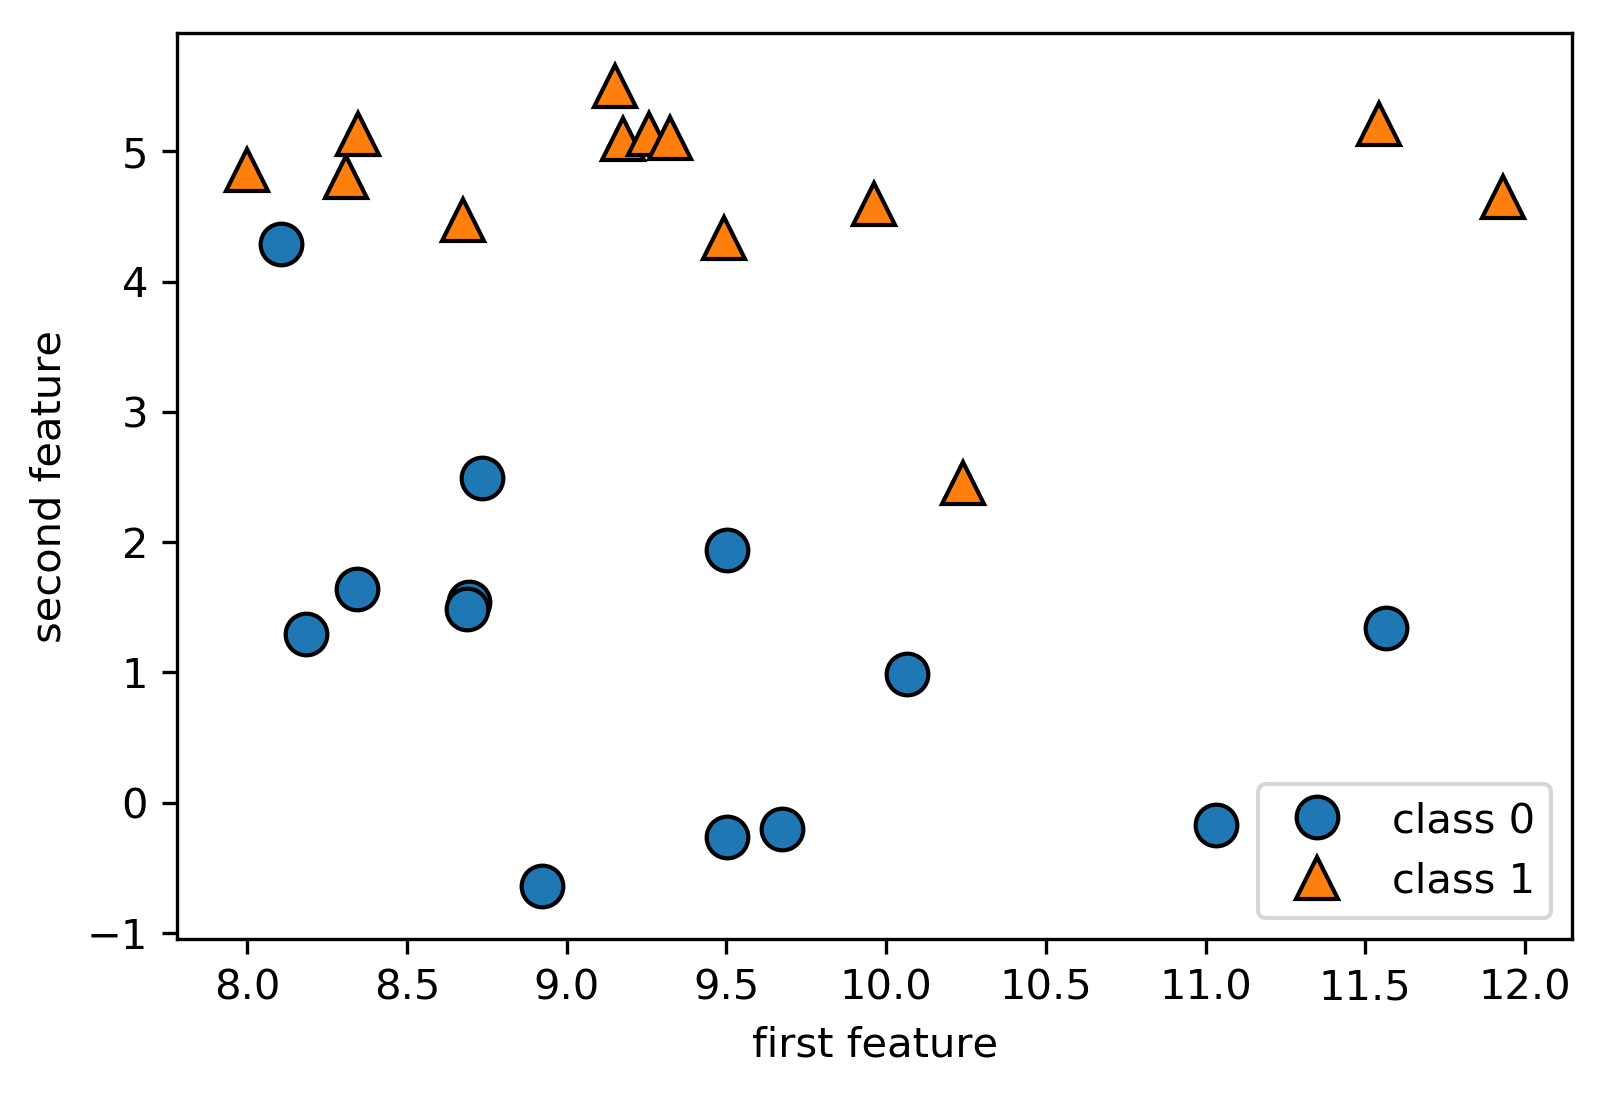

In [6]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4) #오른쪽 하단, 도표 설명
plt.xlabel("first feature")
plt.ylabel("second feature")
print("X.shape: {}".format(X.shape))

&nbsp;&nbsp;특성공학(feature engineering) : 원래의 특성 + 특성끼리 곱함(상호작용)

&nbsp;&nbsp;<h3>2.3.2 k-최근접 이웃</h3><br/>
&nbsp;&nbsp;&nbsp;훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부<br/>
&nbsp;&nbsp;&nbsp;'최근접 이웃'을 찾음

&nbsp;&nbsp;&nbsp;1. 데이터를 훈련 세트와 테스트 세트로 나눈다

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

&nbsp;&nbsp;&nbsp;2. KNeighborsClassifier를 import하고 객체를 만듦.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

&nbsp;&nbsp;&nbsp;3. 훈련 세트를 사용하여 분류 모델을 학습시킴

In [18]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

&nbsp;&nbsp;&nbsp;4. 테스트 데이터에 대해 predict 메서드를 호출해서 예측함

In [19]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


&nbsp;&nbsp;&nbsp;5. 모델이 얼마나 잘 일반화되었는지 평가하기 위해 score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출함

In [20]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


&nbsp;&nbsp;&nbsp;<b>KNeighborsClassifier 분석</b> <br/>
&nbsp;&nbsp;&nbsp;&nbsp;결정 경계(decision boundary)<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;부드러운 경계 = 단순한 모델<br/>
&nbsp;&nbsp;&nbsp;&nbsp;이웃을 적게 사용 : 모델의 복잡도 높아짐(과대적합)<br/>
&nbsp;&nbsp;&nbsp;&nbsp;이웃을 많이 사용 : 모델의 복잡도 낮아짐(과소적합)

&nbsp;&nbsp;&nbsp;<b>KNeighborsRegressor 분석</b> <br/>
&nbsp;&nbsp;&nbsp;&nbsp;회귀를 위한 k-최근접 이웃 알고리즘

&nbsp;&nbsp;&nbsp;<b>장단점과 매개변수</b> <br/>
&nbsp;&nbsp;&nbsp;&nbsp;데이터 포인트 사이의 거리를 재는 방법, 이웃의 수<br/>
&nbsp;&nbsp;&nbsp;&nbsp;training set가 매우 크면 예측이 느려짐<br/>
&nbsp;&nbsp;&nbsp;&nbsp;데이터를 전처리하는 과정이 중요<br/>
&nbsp;&nbsp;&nbsp;&nbsp;많은 feature를 가진 dataset에서는 잘 동작하지 않음<br/>
&nbsp;&nbsp;&nbsp;&nbsp;feature 값 대부분이 0인 dataset과는 잘 동작하지 않음

&nbsp;&nbsp;<h3>2.3.3 선형 모델</h3><br/>
<ul>
<li>특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 냄</li>
<li>선형 회귀(최소제곱법), 릿지 회귀, 라쏘 -> alpha </li>
<li>선형 분류 알고리즘 : 로지스틱 회귀, 서포트 벡터 머신 -> C</li>
</ul>

&nbsp;&nbsp;<h3>2.3.4 나이브 베이즈 분류기</h3><br/>
<ul>
    <li>GaussianNB(연속적인 데이터), BernoulliNB(이진 데이터), MultinomialNB(카운트 데이터)</li>
    <li>alpha가 크면 더 완만해지고 모델의 복잡도는 낮아짐 </li>
    <li>훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉬움</li>
    <li>선형 모델로는 학습 시간 오래 걸리는 큰 데이터셋에서 나이브 베이즈 모델 시도해볼만 함</li>
</ul>